In [1]:
#Linear regression with multiple variables to predict the prices of houses.

In [ ]:
%matplotlib notebook
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model

In [1]:
df=pd.read_csv(r'C:\Users\User\I am learning ML\Multi-Variable Linear Regression\ex1data2.txt')
print("This is the dataframe:",df)

NameError: name 'pd' is not defined

In [4]:
#convert the pandas series to a numpy array
arr=np.loadtxt("ex1data2.txt",delimiter=",")
print(arr)
df=pd.DataFrame(arr,columns=['Size_in_square_feet','No_of_bedrooms','Price'])
df

[[2.10400e+03 3.00000e+00 3.99900e+05]
 [1.60000e+03 3.00000e+00 3.29900e+05]
 [2.40000e+03 3.00000e+00 3.69000e+05]
 [1.41600e+03 2.00000e+00 2.32000e+05]
 [3.00000e+03 4.00000e+00 5.39900e+05]
 [1.98500e+03 4.00000e+00 2.99900e+05]
 [1.53400e+03 3.00000e+00 3.14900e+05]
 [1.42700e+03 3.00000e+00 1.98999e+05]
 [1.38000e+03 3.00000e+00 2.12000e+05]
 [1.49400e+03 3.00000e+00 2.42500e+05]
 [1.94000e+03 4.00000e+00 2.39999e+05]
 [2.00000e+03 3.00000e+00 3.47000e+05]
 [1.89000e+03 3.00000e+00 3.29999e+05]
 [4.47800e+03 5.00000e+00 6.99900e+05]
 [1.26800e+03 3.00000e+00 2.59900e+05]
 [2.30000e+03 4.00000e+00 4.49900e+05]
 [1.32000e+03 2.00000e+00 2.99900e+05]
 [1.23600e+03 3.00000e+00 1.99900e+05]
 [2.60900e+03 4.00000e+00 4.99998e+05]
 [3.03100e+03 4.00000e+00 5.99000e+05]
 [1.76700e+03 3.00000e+00 2.52900e+05]
 [1.88800e+03 2.00000e+00 2.55000e+05]
 [1.60400e+03 3.00000e+00 2.42900e+05]
 [1.96200e+03 4.00000e+00 2.59900e+05]
 [3.89000e+03 3.00000e+00 5.73900e+05]
 [1.10000e+03 3.00000e+00

,Size_in_square_feet,No_of_bedrooms,Price
0,2104.0,3.0,399900.0
1,1600.0,3.0,329900.0
2,2400.0,3.0,369000.0
3,1416.0,2.0,232000.0
4,3000.0,4.0,539900.0
5,1985.0,4.0,299900.0
6,1534.0,3.0,314900.0
7,1427.0,3.0,198999.0
8,1380.0,3.0,212000.0
9,1494.0,3.0,242500.0


In [5]:
#separate the x and the y axes
# for the x-axis we want columns at index 0 and index 2 of the array
X = arr[:,[0,2]]
# for the y-axis, we want columns at index 1 of the array
Y= arr[:,1]
# df=pd.DataFrame(X,columns=['Size in square feet','No of bedrooms'])
# df['Price']=pd.Series(Y)
# df

In [6]:
print(X)
print(X.shape)

[[  2104. 399900.]
 [  1600. 329900.]
 [  2400. 369000.]
 [  1416. 232000.]
 [  3000. 539900.]
 [  1985. 299900.]
 [  1534. 314900.]
 [  1427. 198999.]
 [  1380. 212000.]
 [  1494. 242500.]
 [  1940. 239999.]
 [  2000. 347000.]
 [  1890. 329999.]
 [  4478. 699900.]
 [  1268. 259900.]
 [  2300. 449900.]
 [  1320. 299900.]
 [  1236. 199900.]
 [  2609. 499998.]
 [  3031. 599000.]
 [  1767. 252900.]
 [  1888. 255000.]
 [  1604. 242900.]
 [  1962. 259900.]
 [  3890. 573900.]
 [  1100. 249900.]
 [  1458. 464500.]
 [  2526. 469000.]
 [  2200. 475000.]
 [  2637. 299900.]
 [  1839. 349900.]
 [  1000. 169900.]
 [  2040. 314900.]
 [  3137. 579900.]
 [  1811. 285900.]
 [  1437. 249900.]
 [  1239. 229900.]
 [  2132. 345000.]
 [  4215. 549000.]
 [  2162. 287000.]
 [  1664. 368500.]
 [  2238. 329900.]
 [  2567. 314000.]
 [  1200. 299000.]
 [   852. 179900.]
 [  1852. 299900.]
 [  1203. 239500.]]
(47, 2)


In [7]:
print(Y)

[3. 3. 3. 2. 4. 4. 3. 3. 3. 3. 4. 3. 3. 5. 3. 4. 2. 3. 4. 4. 3. 2. 3. 4.
 3. 3. 3. 3. 3. 3. 2. 1. 4. 3. 4. 3. 3. 4. 4. 4. 2. 3. 4. 3. 2. 4. 3.]


In [8]:
#reshape the array of Y axis to a vector
Y=arr[:, 1].reshape(Y.size, 1)
Y
print(Y.shape)

(47, 1)


In [9]:
# apply linear regression
model = smf.ols(formula='Price ~ Size_in_square_feet+ No_of_bedrooms', data=df)
results_formula = model.fit()
results_formula.params

Intercept              89597.909543
Size_in_square_feet      139.210674
No_of_bedrooms         -8738.019112
dtype: float64

In [10]:
# prepare the data for visualization
# creating points from both ends
x_surf, y_surf =np.meshgrid(np.linspace(df.Size_in_square_feet.min(),df.Size_in_square_feet.max(),100),np.linspace(df.No_of_bedrooms.min(),df.No_of_bedrooms.max(),100))
onlyX=pd.DataFrame({'Size_in_square_feet': x_surf.ravel(),'No_of_bedrooms':y_surf.ravel()})
fittedY=results_formula.predict(exog=onlyX)
# matplotlib expects an array
fittedY=np.array(fittedY)

In [11]:
# we can now visualize our multiple linear regression

<IPython.core.display.Javascript object>


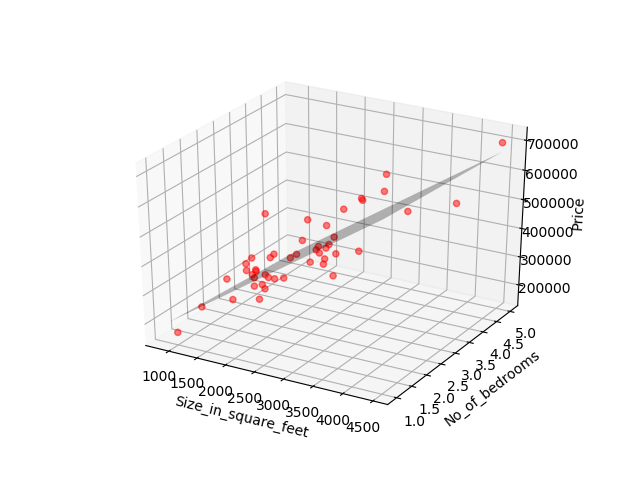

In [12]:
fig = plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.scatter(df['Size_in_square_feet'],df['No_of_bedrooms'],df['Price'], c='red',marker='o',alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape),color='None',alpha=0.3)
ax.set_xlabel('Size_in_square_feet')
ax.set_ylabel('No_of_bedrooms')
ax.set_zlabel('Price')
plt.show()

In [13]:
# create a class for the model
reg = linear_model.LinearRegression()
reg.fit(df[['Size_in_square_feet','No_of_bedrooms']],df.Price)
reg.predict([[4500,3]])
print("The price of a house with 4500 sq.feet and 3 bedrooms is equal to:",reg.predict([[4500,3]]))
reg.predict([[2100,1]])

The price of a house with 4500 sq.feet and 3 bedrooms is equal to: [689831.88528513]


array([373202.30586748])